if salary > 50000

In [57]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split#split train and test data
from sklearn import metrics#to get rms value
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


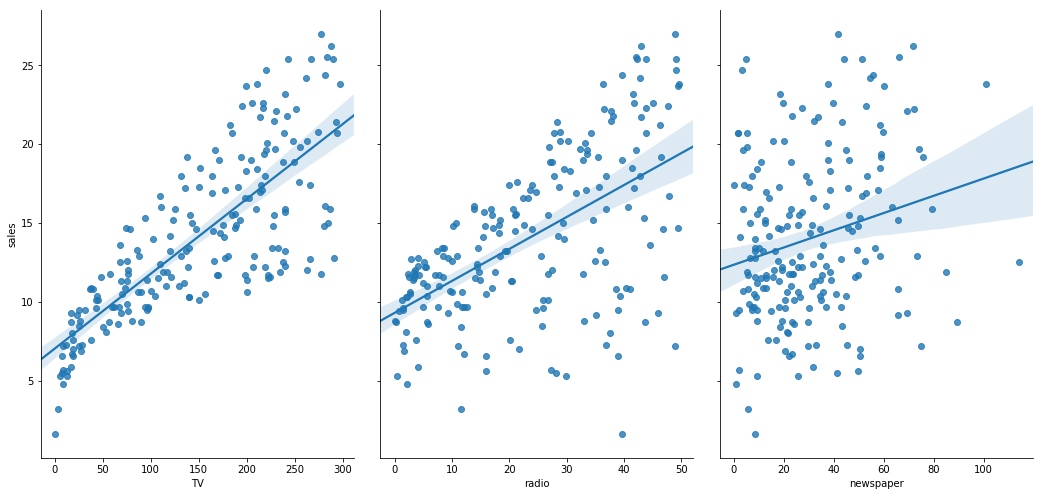

In [58]:
data = pd.read_csv("data2.csv")
# array = []
#what we are supposed to achieve
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',height = 7,aspect = 0.7,kind = 'reg')
x = data[['TV','radio','newspaper']]
y= data.sales # EQUALS TO data['sales']

In [59]:
print(data)
# print(x)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
5             6    8.7   48.9       75.0    7.2
6             7   57.5   32.8       23.5   11.8
7             8  120.2   19.6       11.6   13.2
8             9    8.6    2.1        1.0    4.8
9            10  199.8    2.6       21.2   10.6
10           11   66.1    5.8       24.2    8.6
11           12  214.7   24.0        4.0   17.4
12           13   23.8   35.1       65.9    9.2
13           14   97.5    7.6        7.2    9.7
14           15  204.1   32.9       46.0   19.0
15           16  195.4   47.7       52.9   22.4
16           17   67.8   36.6      114.0   12.5
17           18  281.4   39.6       55.8   24.4
18           19   69.2   20.5       18.3   11.3
19           20  147.3   23.9       19.1

In [60]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=50)#random selection of train and test set (random_state)
# Created the object of linearRegression
linearreg = LinearRegression()
lin = linearreg.fit(X_train,y_train)#get the train model
print(lin)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [61]:
y_predict = linearreg.predict(X_test)#observed value got from X_test
print('error',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))#root mean square error
coef =linearreg.coef_#get the coeff of the linear regression model
print(coef)
c = linearreg.intercept_
print('intercept',linearreg.intercept_)#get the intercept of the linear regression model

error 1.4560791402121012
[0.04707704 0.18489681 0.00369981]
intercept 2.6818151231384455


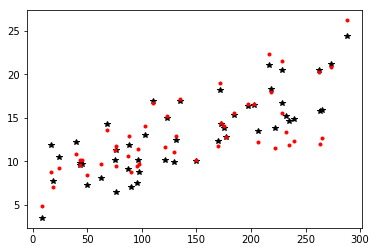

In [62]:
# plt.plot(X_test["TV"],y_predict,'.')
plt.plot(X_test["TV"],y_predict,'k*')#k is black and '*' the symbol on the graph
plt.plot(X_test['TV'],y_test,'r.')#red and '.' format
plt.show()

# Classifier

In [63]:
from sklearn import tree

In [64]:
features = [[155,2],[130,2],[135,1],[110,1],[20,1],[25,1]] #2 represent rough and 1 represent smooth texture
# features = [[weight,texture]] 2 represent rough, 1 represents smooth
labels = [0,0,1,1,2,2]
# labels- 0 represent orange, 2 represents berry, 1 represent apple
classifier = tree.DecisionTreeClassifier()
# print(type(classifier))
classifier = classifier.fit(features,labels)
#decision tree fails when given continuous values

In [65]:
classify = classifier.predict([[30,2]])

if classify == 1:
    print("Apple")
elif classify == 0:
    print("Orange")
elif classify == 2:
    print('Berries')

Berries


# KNN

In [66]:
import math
import matplotlib.pyplot as plt

In [67]:
def classify(points,p,k):#points is training set and p is the test set k is the nearest neighbour
    distance=list()
    for group in points: # Getting iterated 2 times
        print('group',group)
#         print(points[group])
#         print('-'*100)
        for feature in points[group]:#each point in points find the distance to the test point
            euclidean_distance = math.sqrt((feature[0]-p[0])**2+(feature[1]-p[1])**2)
            distance.append((euclidean_distance,group))
    print(distance)
    print('-'*100)
#     print(sorted(distance))
#     print('-'*100)
    distance = sorted(distance)[:k]#starting 3 smallest distance
#     print(distance)
#     print('-'*100)
    freq1 = 0 # representing group 0
    freq2 = 0 # representing group 1
    for d in distance:
        if d[1]==0:
            freq1 +=1
        elif d[1]==1:
            freq2 +=1
    return 0 if freq1>freq2 else 1


In [68]:
def knn():
    points={0:[(1,12),(2,5),(3,6),(3,10),(3.5,8),(2,11),(2,9),(1,7)],
            1:[(5,3),(3,2),(1.5,9),(7,2),(6,1),(3.8,1),(5.6,4),(4,2),(2,5)]}
    p=(4,5)
    k=3
    print("The value classified to unknown point is Group {}".format(classify(points,
                                                                         p,k)))

In [69]:
knn()

group 0
group 1
[(7.615773105863909, 0), (2.0, 0), (1.4142135623730951, 0), (5.0990195135927845, 0), (3.0413812651491097, 0), (6.324555320336759, 0), (4.47213595499958, 0), (3.605551275463989, 0), (2.23606797749979, 1), (3.1622776601683795, 1), (4.716990566028302, 1), (4.242640687119285, 1), (4.47213595499958, 1), (4.004996878900157, 1), (1.8867962264113205, 1), (3.0, 1), (2.0, 1)]
----------------------------------------------------------------------------------------------------
The value classified to unknown point is Group 0


In [70]:
points={0:[(1,12),(2,5),(3,6),(3,10),(3.5,8),(2,11),(2,9),(1,7)],1:[(5,3),(3,2)
,(1.5,9),(7,2),(6,1),(3.8,1),(5.6,4),(4,2),(2,5)]}
x=list()
y= list()
for i in points[0]:
    x.append(i[0])
    y.append(i[1])
for i in points[1]:
    x.append(i[0])
    y.append(i[1])

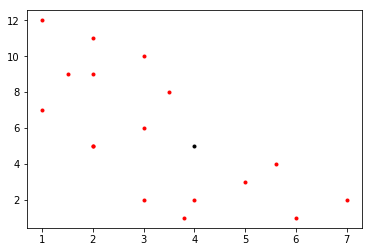

In [71]:
plt.plot(x,y,'r.')
plt.plot(4,5,'k.')